# Final Project: IMGT Data Analysis

## Tim Watkins

# Overview
## Antibody-producing B cells are incredibly diverse due to VDJ recombination in development (10^12 unique antibodies/B cells)
<img src="AbDiversitgy.png">

* Taken from https://www.immunology.org/

## Certain infectious diseases/vaccines preferentially elicit expansion of specific B cell lineages
<img src="VHrep.png">

* Jardine et. al. 2016

## Understanding antibody/B cell repertoire distribution may help guide vaccination strategies/analyze success of new vaccines

# IMGT Data in CSV Format
* IMGT can analyze a wide range of characteristics of many B cell sequences, but the output is multiple CSV files that need to be filtered/analyzed to make sense

* http://www.imgt.org/IMGT_vquest/vquest

<img src="Picture1.png">

### Project Goals:
* Use IMGT to process sequencing data on B cell antibody repetoires
* Load IMGT CSV file into Pandas
* Quickly process V-Gene data into pie chart/histogram of gene frequencies
* Identify clonally related B cells by V-, D-, J-genes or H-CDR3
* Create histogram of H-CDR3 lengths

# Loading CSV File as Pandas DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
pdSummary = pd.read_csv('1_Summary.csv')

- Loop through all sequences and trim V-Gene column to only contain "IGHVX-XX-XX" portion
- Add this trimmed data set to DataFrame

In [2]:
trimmedgene = []
for i in range(len(pdSummary['Sequence number'] - 1)):
    conv = int(i)
    splstr = pdSummary['V-GENE and allele'][conv].split(' ')
    trimmedgene.append(splstr[1])
pdSummary['Trimmed V-GENE'] = trimmedgene
print(trimmedgene)

['IGHV3-48*02', 'IGHV3-48*02', 'IGHV4-59*01', 'IGHV4-4*02', 'IGHV3-23*01', 'IGHV1-69-2*01', 'IGHV3-48*02', 'IGHV4-59*01', 'IGHV3-11*01', 'IGHV3-48*02', 'IGHV3-48*02', 'IGHV3-9*01', 'IGHV4-61*01', 'IGHV3-48*02', 'IGHV6-1*01', 'IGHV4-39*07', 'IGHV1-18*01', 'IGHV1-2*02', 'IGHV3-9*01', 'IGHV3-48*02', 'IGHV3-23*04', 'IGHV3-48*02', 'IGHV3-23*04', 'IGHV3-23*04', 'IGHV3-21*01', 'IGHV3-64D*06', 'IGHV3-21*01', 'IGHV3-23*04', 'IGHV4-61*01', 'IGHV4-4*02', 'IGHV3-48*04', 'IGHV3-48*04', 'IGHV1-18*01', 'IGHV4-39*07', 'IGHV3-23*04', 'IGHV3-49*03', 'IGHV4-4*02']


Trimmed V-GENE
IGHV1-18*01      2
IGHV1-2*02       1
IGHV1-69-2*01    1
IGHV3-11*01      1
IGHV3-21*01      2
IGHV3-23*01      1
IGHV3-23*04      5
IGHV3-48*02      8
IGHV3-48*04      2
IGHV3-49*03      1
IGHV3-64D*06     1
IGHV3-9*01       2
IGHV4-39*07      2
IGHV4-4*02       3
IGHV4-59*01      2
IGHV4-61*01      2
IGHV6-1*01       1
Name: Sequence ID, dtype: int64


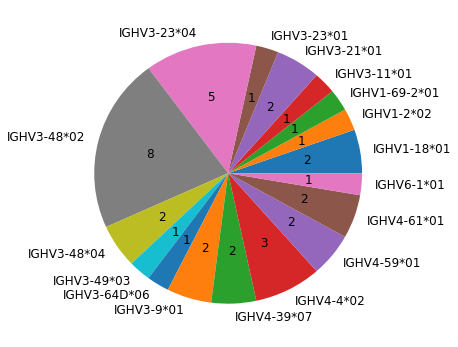

In [3]:
IgRep = pdSummary.groupby('Trimmed V-GENE')['Sequence ID'].nunique()
print(IgRep)
def absolute_value(val):
    a = np.round(val/100.* IgRep.sum(), 0)
    a = int(a)
    return a
IgRep.plot.pie(autopct = absolute_value, fontsize = 12, figsize=(6,6))
plt.ylabel('')
plt.show()

## Now I want to detect which of these B cells are clones using the D-Gene
* I may use the AA Junction or J-gene as well in cases of high quality sequence data

In [4]:
plt.clf()

In [5]:
DGeneTrim = []
for i in range(len(pdSummary['Sequence number'])):
    conv = int(i)
    if isinstance(pdSummary['D-GENE and allele'][conv], str) == True:
        splstr = pdSummary['D-GENE and allele'][conv].split(' ')
        DGeneTrim.append(splstr[1]) 
        #Splitting the string using ' ' as a delimiter always leads to a list containing the
        #gene identity as the 2nd element. I then append this to the 'DGeneTrim' list
    else:
        DGeneTrim.append('') 
        #Some sequences do not return a D-Gene identity due to sequencing issues, so an empty string will
        #be added to the list to assure it maintains the same dimensionality as the DataFrame.
pdSummary['Trimmed D-GENE'] = DGeneTrim
print(DGeneTrim)

['IGHD3-10*01', 'IGHD6-13*01', 'IGHD6-6*01', 'IGHD2-2*01', 'IGHD2-8*02', 'IGHD1-26*01', 'IGHD3-22*01', 'IGHD2-21*01', 'IGHD6-13*01', 'IGHD3-10*01', '', '', 'IGHD1-26*01', 'IGHD3-10*01', 'IGHD3-9*01', 'IGHD2-15*01', 'IGHD2-2*01', 'IGHD2-2*01', 'IGHD6-13*01', 'IGHD2-15*01', 'IGHD6-19*01', '', 'IGHD3-22*01', 'IGHD6-19*01', 'IGHD7-27*01', 'IGHD5-12*01', 'IGHD2-21*01', '', 'IGHD6-13*01', 'IGHD6-19*01', 'IGHD3-10*01', 'IGHD2-2*03', 'IGHD3-22*01', 'IGHD2-15*01', 'IGHD4-17*01', 'IGHD3-3*01', 'IGHD4-17*01']


In [6]:
pdSummary['VD'] = pdSummary['Trimmed V-GENE'] + ' ' + pdSummary['Trimmed D-GENE']
#If I concatenate my V and D-Gene identities into a new column, I can then count the number of unique instances in
#this new column, which likely represents the number of unique B cell clones sequenced in this dataset.
CloneIDs = pdSummary.groupby('VD')['Sequence ID'].nunique()
print(CloneIDs)
print('There are %d unique clones in this dataset.' %len(CloneIDs))

VD
IGHV1-18*01 IGHD2-2*01       1
IGHV1-18*01 IGHD3-22*01      1
IGHV1-2*02 IGHD2-2*01        1
IGHV1-69-2*01 IGHD1-26*01    1
IGHV3-11*01 IGHD6-13*01      1
IGHV3-21*01 IGHD2-21*01      1
IGHV3-21*01 IGHD7-27*01      1
IGHV3-23*01 IGHD2-8*02       1
IGHV3-23*04                  1
IGHV3-23*04 IGHD3-22*01      1
IGHV3-23*04 IGHD4-17*01      1
IGHV3-23*04 IGHD6-19*01      2
IGHV3-48*02                  2
IGHV3-48*02 IGHD2-15*01      1
IGHV3-48*02 IGHD3-10*01      3
IGHV3-48*02 IGHD3-22*01      1
IGHV3-48*02 IGHD6-13*01      1
IGHV3-48*04 IGHD2-2*03       1
IGHV3-48*04 IGHD3-10*01      1
IGHV3-49*03 IGHD3-3*01       1
IGHV3-64D*06 IGHD5-12*01     1
IGHV3-9*01                   1
IGHV3-9*01 IGHD6-13*01       1
IGHV4-39*07 IGHD2-15*01      2
IGHV4-4*02 IGHD2-2*01        1
IGHV4-4*02 IGHD4-17*01       1
IGHV4-4*02 IGHD6-19*01       1
IGHV4-59*01 IGHD2-21*01      1
IGHV4-59*01 IGHD6-6*01       1
IGHV4-61*01 IGHD1-26*01      1
IGHV4-61*01 IGHD6-13*01      1
IGHV6-1*01 IGHD3-9*01        1
Name:

# Next, I want to produce a graph containing the distribution of H-CDR3 lengths in these unique clones:

In [7]:
varbool = pdSummary['VD'].duplicated()
invvarbool = ~varbool
print(invvarbool)
#The "duplicated()" function will return a boolean DataFrame which returns False for clones that have not appeared in the
#list before it. I must invert it to return for unique clone identities, which I can then use to filter into a new DataFrame.

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21    False
22     True
23    False
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33    False
34     True
35     True
36     True
Name: VD, dtype: bool


In [8]:
UniqueClones = pdSummary[invvarbool]
#As seen by the sequence number, repeat clones were removed from the dataset.
#I want to look at the 'AA JUNCTION' now and decide how to process it into a histogram of H-CDR3 distributions.
print(UniqueClones['AA JUNCTION'])

0                   CARDRGWGFDPW
1         CARGILISGYSSSYYYYYMDVW
2              CAREYSSSSAYYYMDVW
3                 CAGNQLLVGSFDYW
4         CAKASTTVGYADYYYYYGMDVW
5             CATVDPYMGATQGGFQHW
6                   CARDRGWGFDPW
7                CARLLPLFDAFDIX#
8               CARDRGSSWYGPGYW#
10                           NaN
11                           NaN
12                 CARDGESGSLDYW
14         CAGTYYDILTGYYNWGAFDYW
15                CARDILVTAAFDYW
16       CARDYRSRNYCSSTSCSGWLGYW
17       CARDPVPAALNSYYYYYYGMDVW
18          CAKDILSSYSSSWYGGFDYW
19            CARAIYCSGGSCYDEVHW
20               CAKYKEWVVTNVDYW
22             CARXRPDLXVXX#FXXW
24                CARQNWGSWYFDLW
25    CVKDTLGIGPIGATIG#YYYYYMDVW
26              CARGAYCGGDCYFDYW
27                           NaN
28               CARSLAAAGQNLDYW
29          CARDSGIEQWLVHLNWFDPW
30           CAREGYYGSGSYLNWFDPW
31     CASYVYCSSTSCYWADELSGAFDIW
32            CARDSYYDSRGLDAFDIW
34       CAKVLSNPTKYYGDWVRAFDI##
35        

In [9]:
CDR3 = []
removed = 0
OnlyAA = UniqueClones['AA JUNCTION']
for i in range(len(OnlyAA)):
    conv = int(i)
    if isinstance(OnlyAA.iloc[conv], float) == True:
        removed = removed + 1
    elif '#' in OnlyAA.iloc[conv]:
        removed = removed + 1
    elif len(OnlyAA.iloc[conv]) == 0:
        removed = removed + 1
    else:
        CDR3.append(OnlyAA.iloc[conv])
print(CDR3)

['CARDRGWGFDPW', 'CARGILISGYSSSYYYYYMDVW', 'CAREYSSSSAYYYMDVW', 'CAGNQLLVGSFDYW', 'CAKASTTVGYADYYYYYGMDVW', 'CATVDPYMGATQGGFQHW', 'CARDRGWGFDPW', 'CARDGESGSLDYW', 'CAGTYYDILTGYYNWGAFDYW', 'CARDILVTAAFDYW', 'CARDYRSRNYCSSTSCSGWLGYW', 'CARDPVPAALNSYYYYYYGMDVW', 'CAKDILSSYSSSWYGGFDYW', 'CARAIYCSGGSCYDEVHW', 'CAKYKEWVVTNVDYW', 'CARQNWGSWYFDLW', 'CARGAYCGGDCYFDYW', 'CARSLAAAGQNLDYW', 'CARDSGIEQWLVHLNWFDPW', 'CAREGYYGSGSYLNWFDPW', 'CASYVYCSSTSCYWADELSGAFDIW', 'CARDSYYDSRGLDAFDIW', 'CTRDQGPYYDFWSGYYTVFDYW', 'CARCSYGDYSLDYW']


In [10]:
CDR3Lengths = []
for i in range(len(CDR3)):
    CDR3H = len(CDR3[i]) - 2
    CDR3Lengths.append(CDR3H)
print(CDR3Lengths)

[10, 20, 15, 12, 20, 16, 10, 11, 19, 12, 21, 21, 18, 16, 13, 12, 14, 13, 18, 17, 23, 16, 20, 12]


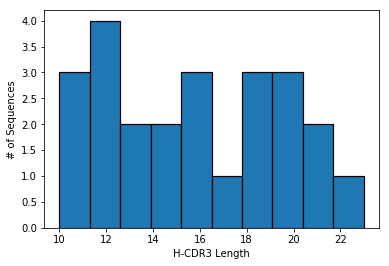

In [11]:
plt.hist(CDR3Lengths, bins = 10, edgecolor = 'black', linewidth = 1.2)
plt.xlabel('H-CDR3 Length')
plt.ylabel('# of Sequences')
plt.show()

** This may be compared to the normal distribution of all B cells to determine if an experiment selects for longer/shorter H-CDR3s (in progress)

In [12]:
plt.clf()

# Next project: Mutation Hotspot Analysis
## In lymphoid tissue, AID (Activation-Induced cytidine Deaminase) adds mutations to antibody variable regions to promote increase in antigen binding affinity. These B cells eventually become plasma cells or memory B cells.